# MSDS692 Project: Time Series Analysis, Car Accidents in Denver (2014-2018)
## Natalia Weakly 
### Monthly Accident Data

## Data Load

In [1]:
# Imports
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# to increase the size of the graphs
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20, 15

In [3]:
# Load csv file
# Initial data was previousely processed with MSDS692_IndividualAccidents.ipynb and saved as a .csv file
accidents_ts=pd.read_csv('../MSDSProject/accidents_all_withIDs.csv',index_col=0, parse_dates=[2, 5])

In [4]:
# Check load results
accidents_ts.head()

,OBJECTID_1,FIRST_OCCURENCE_DATE,GEO_LON,GEO_LAT,Date,BicycleInvolved,PedestrianInvolved,Holiday,RushHour,Daytime,...,Neighboorhood_Westwood,Neighboorhood_Whittier,Neighboorhood_Windsor,DayOfWeek_0,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6
0,41743,2014-01-01 00:40:00,-104.993603,39.745019,2014-01-01,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,41745,2014-01-01 01:35:00,-104.969690,39.740025,2014-01-01,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,41746,2014-01-01 02:04:00,-104.988533,39.740564,2014-01-01,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,41748,2014-01-01 03:30:00,-105.034616,39.758519,2014-01-01,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,41749,2014-01-01 03:50:00,-104.809755,39.790353,2014-01-01,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [5]:
accidents_ts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120056 entries, 0 to 120055
Columns: 128 entries, OBJECTID_1 to DayOfWeek_6
dtypes: datetime64[ns](2), float64(14), int64(112)
memory usage: 118.2 MB


In [6]:
# copy the 'Date' and 'OBJECTID_1' columns into a new dataframe 
accidents_ts2 = accidents_ts[['Date', 'OBJECTID_1']]

In [7]:
accidents_ts2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120056 entries, 0 to 120055
Data columns (total 2 columns):
Date          120056 non-null datetime64[ns]
OBJECTID_1    120056 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.7 MB


In [8]:
# Calculate the monthly number of accidents
accidents_ts3 = accidents_ts2.groupby(accidents_ts2['Date'].dt.to_period('M'))[['OBJECTID_1']].count()

In [9]:
# check results
accidents_ts3.head()

,OBJECTID_1
Date,
2014-01,1897
2014-02,1683
2014-03,1719
2014-04,1720
2014-05,1792


In [10]:
accidents_ts3.tail()

,OBJECTID_1
Date,
2018-08,2146
2018-09,2203
2018-10,2270
2018-11,2076
2018-12,1918


In [11]:
# rename the 'OBJECTID_1' column
accidents_ts3.rename(columns={'OBJECTID_1':'NumberOfAccidents'}, inplace=True)

In [12]:
# change the index type to timestamp
accidents_ts3.index = accidents_ts3.index.to_timestamp()

In [13]:
# Check results
accidents_ts3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2014-01-01 to 2018-12-01
Freq: MS
Data columns (total 1 columns):
NumberOfAccidents    60 non-null int64
dtypes: int64(1)
memory usage: 960.0 bytes


The time series contains monthly accidents information for 2014-2018, and it is ready for the analysis. 

## Stationarity  Check

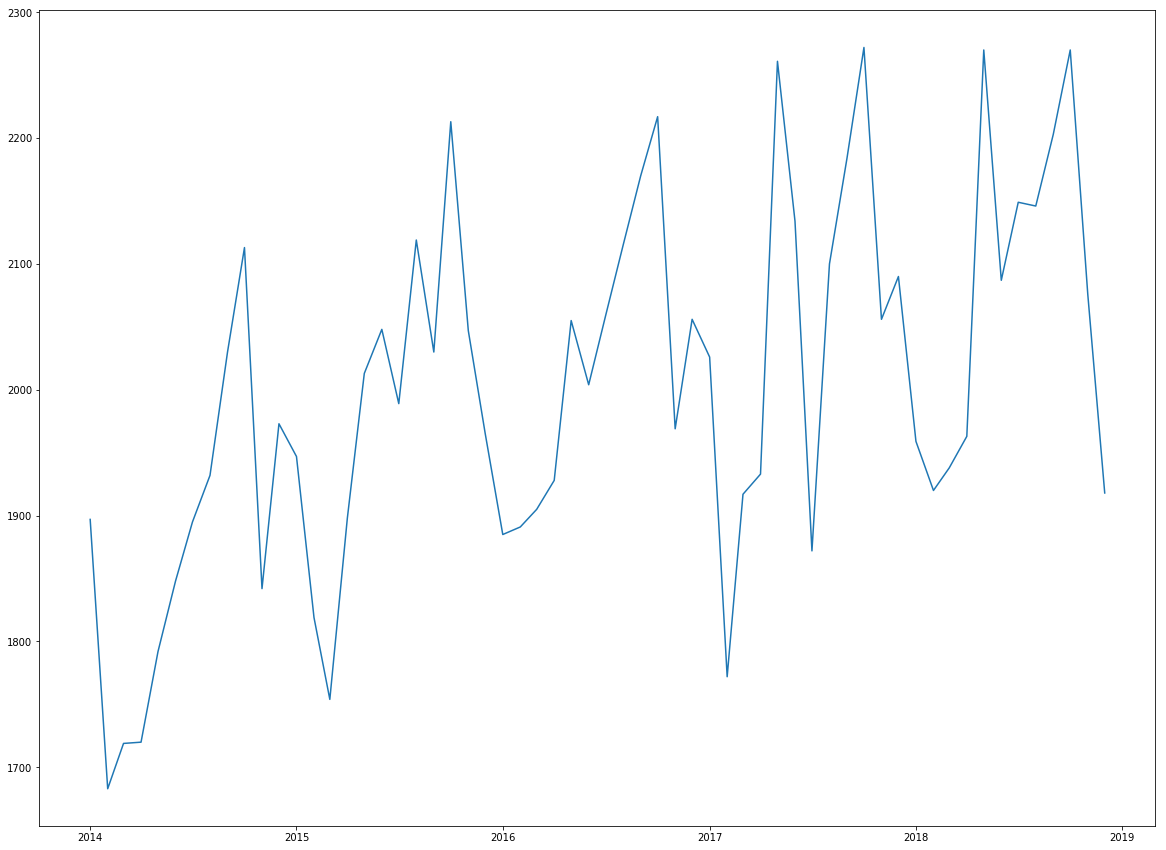

In [14]:
# Let's visually inspect the time series
plt.plot(accidents_ts3)


The plot suggests that this time series is not stationary. There seems to be an upwards trend (the mean is not constant), the variance is not constant, and there are potential cyclical variations.


In [15]:
# Let's use a formal statistical test for stationarity - Augmented Dickey-Fuller test
# H0: The time series can be represented by a unit root ( = has time-dependent structure, is not stationary)
# HA: The time series does not have a unit root (= is stationary)

# if p > 0.05  - fail to reject H0 hypothesis => the data is not stationary
# if p < = 0.05 - enough evidence to reject the null hypothesis = > data is stationary

from statsmodels.tsa.stattools import adfuller

adf_testresults = adfuller(accidents_ts3['NumberOfAccidents'])
print ('ADF Statistic: %f' % adf_testresults[0])
print ('p-value: %f' % adf_testresults[1])
print('Critical values:')
for key, value in adf_testresults[4].items():
    print('\t%s: %.3f' % (key,value)) 

ADF Statistic: -2.656799
p-value: 0.081817
Critical values:
	1%: -3.575
	5%: -2.924
	10%: -2.600


The test returned p-value  > 0.05 and the test statistic of -2.656799 which is more than the critical value of -3.575 at 1% and -2.924 critical values at 5%. It means that we do not have enough evidence to reject the null hypothesis stating that the time series is not stationary. Before using this time series for forecasting, we need to make it stationary.

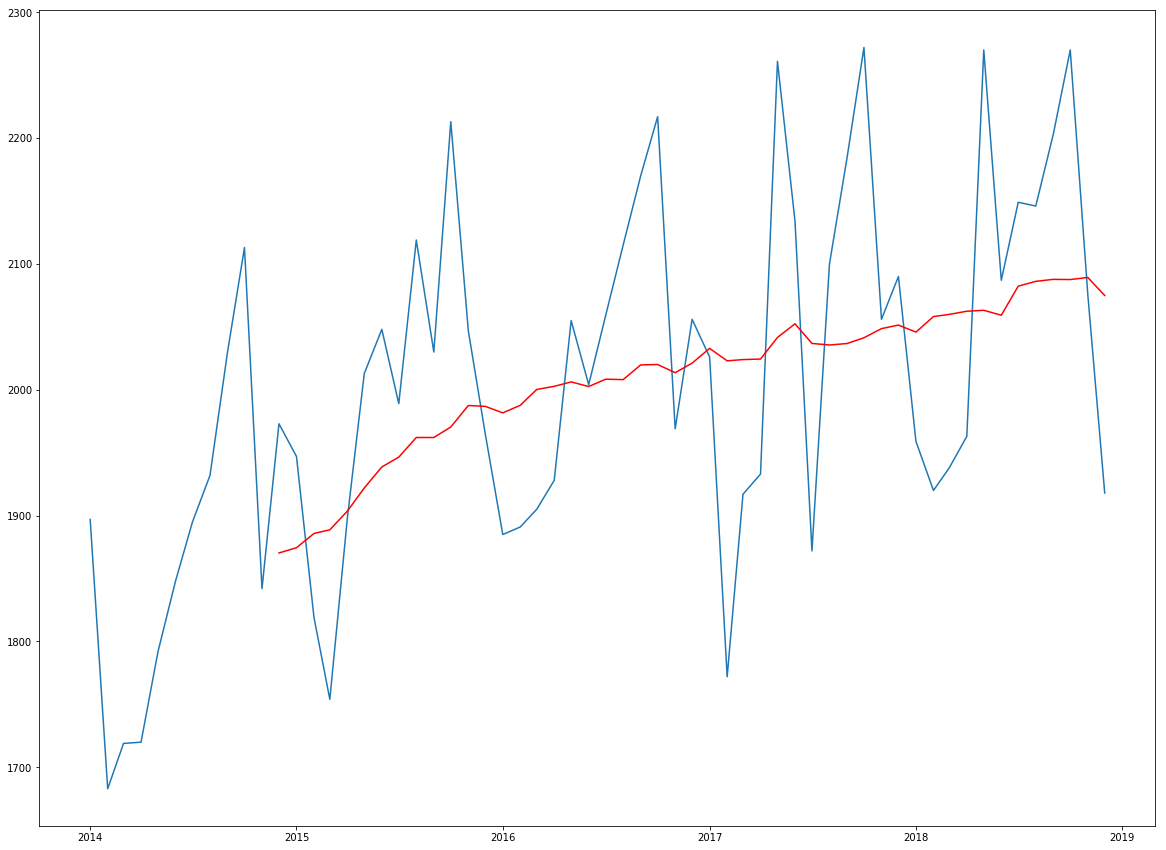

In [16]:
# calculate the 12 months moving average
moving_average = accidents_ts3.rolling(12).mean()
plt.plot(accidents_ts3)
plt.plot(moving_average, color='red')

In [17]:
# subtract the moving average from the initial data
ts_movingdifference = accidents_ts3 - moving_average
ts_movingdifference.head(15)

,NumberOfAccidents
Date,
2014-01-01,NaN
2014-02-01,NaN
2014-03-01,NaN
2014-04-01,NaN
2014-05-01,NaN
2014-06-01,NaN
2014-07-01,NaN
2014-08-01,NaN
2014-09-01,NaN


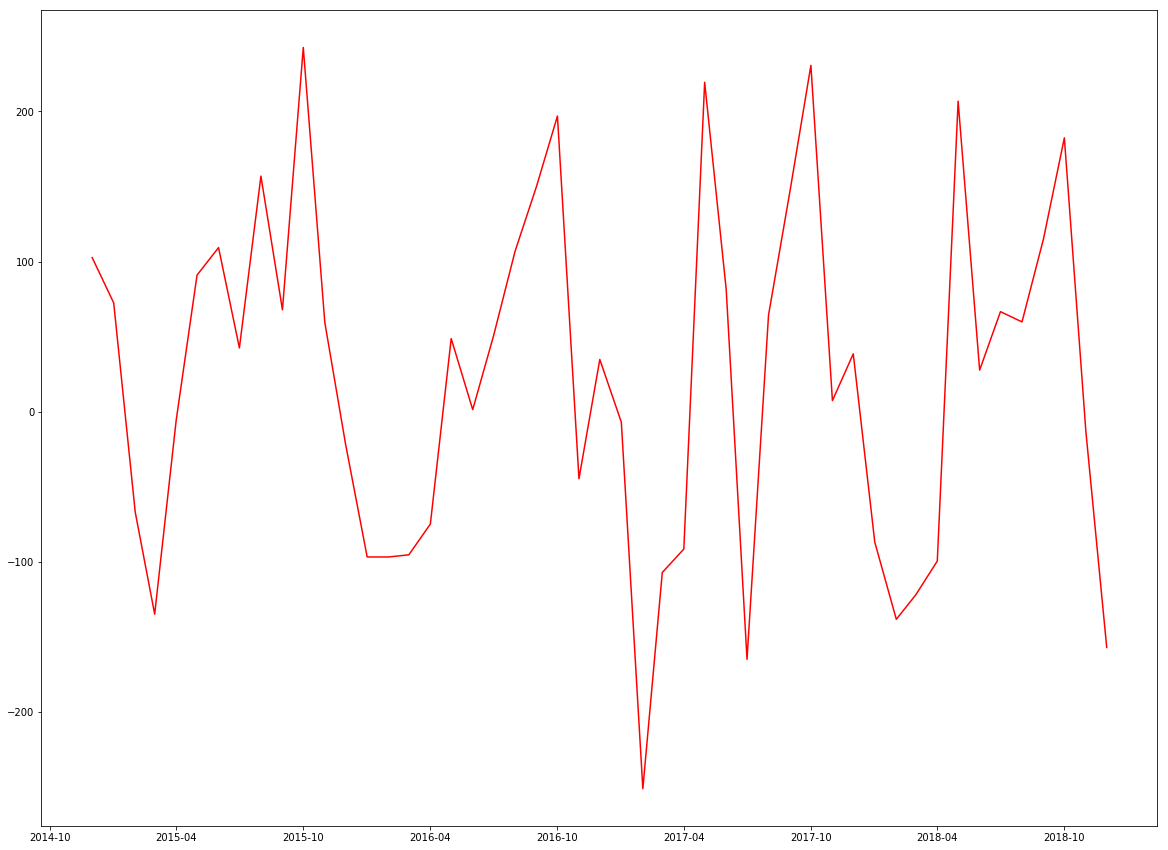

In [18]:
# plot the resulting time series
ts_movingdifference.dropna(inplace=True)
plt.plot(ts_movingdifference, color='red')

In [19]:
# The mean of the resulting time series appears to be constant, but the variation is not. Let's use a formal statistical test for stationarity to check.

# Augmented Dickey-Fuller test for stationarity
adf_testresults2 = adfuller(ts_movingdifference['NumberOfAccidents'])
print ('ADF Statistic: %f' % adf_testresults2[0])
print ('p-value: %f' % adf_testresults2[1])
print('Critical values:')
for key, value in adf_testresults2[4].items():
    print('\t%s: %.3f' % (key,value))


ADF Statistic: -2.971337
p-value: 0.037659
Critical values:
	1%: -3.621
	5%: -2.944
	10%: -2.610



Taking rolling mean on the initial data smoothes fluctuations, but there is still an apparent trend in the data. 

Subtracting the moving average from the initial data eliminated the trend from the data (mean is about the same), but as the graph above shows, did not completely eliminate uneven variations. However, the Augmented Dickey-Fuller test returned the p-value of 0.037659, which is smaller than the significance level of 0.05. The test statistic of -2.971337 is smaller than the critical level at 5%. So, we could say that this time series is stationary with 95% confidence. Although, the moving average is not defined for the first 11 months. So, if we use this method we will lose almost a year worth of training data.  

Let's compare these results with the exponentially weighted moving average.


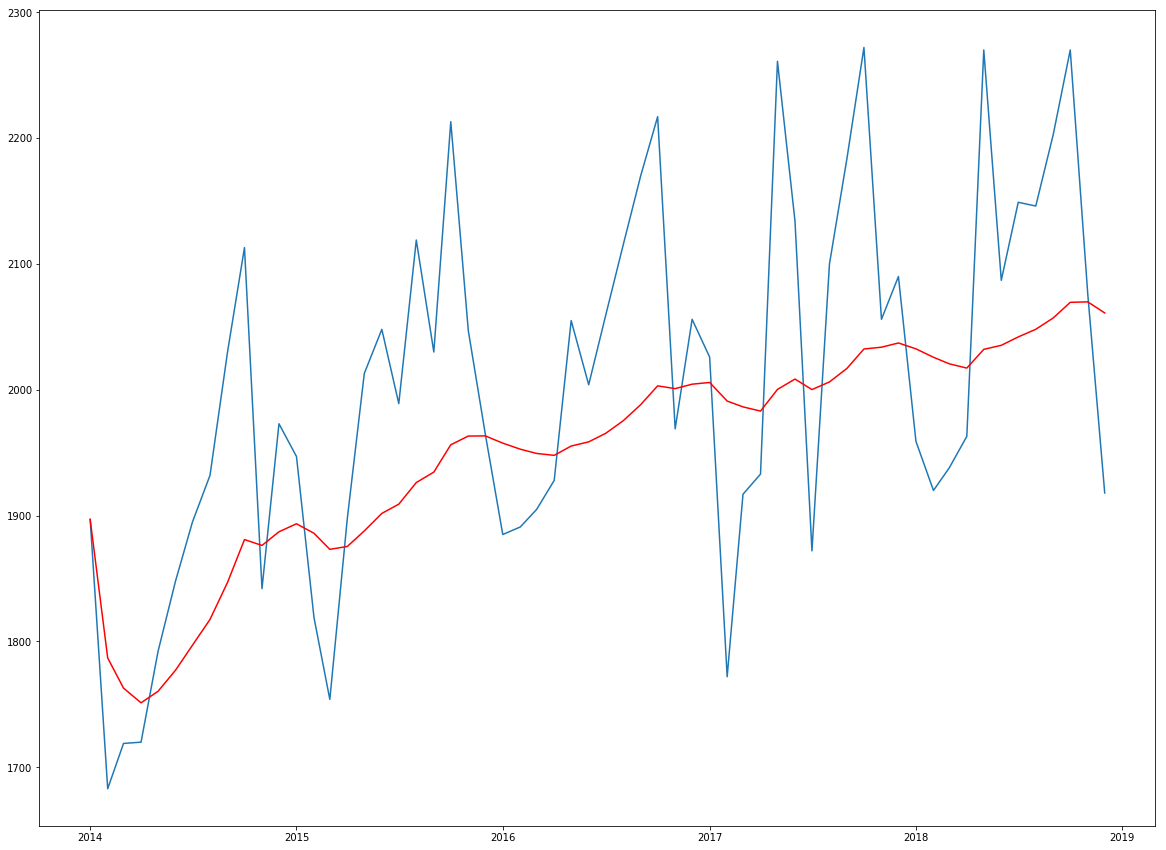

In [20]:
# Exponentially weighted moving average (using decay factor)
ts_expweightedave = accidents_ts3.ewm(halflife=12).mean()
plt.plot(accidents_ts3)
plt.plot(ts_expweightedave, color='red')

In [21]:
# Subtract the exponentially weighted moving average from the initial time series
ts_expwdifference = accidents_ts3 - ts_expweightedave

# Augmented Dickey-Fuller test for stationarity
adf_testresults3 = adfuller(ts_expwdifference['NumberOfAccidents'])
print ('ADF Statistic: %f' % adf_testresults3[0])
print ('p-value: %f' % adf_testresults3[1])
print('Critical values:')
for key, value in adf_testresults3[4].items():
    print('\t%s: %.3f' % (key,value))


ADF Statistic: -1.745138
p-value: 0.408019
Critical values:
	1%: -3.575
	5%: -2.924
	10%: -2.600



The above results show that in our case exponentially weighted moving average method yielded worse results than the simple moving average. The resulting time series is not stationary (p >> 0.05, and the test statistic is higher than even the 10% critical value).

So, let's go back to the stationary time series obtained through subtracting the 12-month moving average from the initial dataset and using it for forecasting.


## Forecasting
### Single Exponential Smoothing

In [22]:
# Holt Winters TS methods

# Single Exponential Smoothing on our data without the trend 
# Note: no data for Jan 2014 - Nov 2014 due to averaging technique

from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Split the data into the training and testing sets
#train dataset 2014- 2017
ts_movingdifftrain=ts_movingdifference[ts_movingdifference.index < '2018']
#test set - 2018
ts_movingdifftest = ts_movingdifference['2018']


In [23]:
# Check split results
len(ts_movingdifftrain)

37

In [24]:
ts_movingdifftrain.tail()

,NumberOfAccidents
Date,
2017-08-01,64.416667
2017-09-01,147.250000
2017-10-01,230.666667
2017-11-01,7.416667
2017-12-01,38.583333


In [25]:
len(ts_movingdifftest)

12

In [26]:
# create the class
model_ses = SimpleExpSmoothing(ts_movingdifftrain)
#fit the model
model_sesfit = model_ses.fit()

In [27]:
# make predictions
predictions2018 = model_sesfit.predict(start="2018-01-01", end='2018-12-01')

In [28]:
predictions2018

2018-01-01    28.80633
2018-02-01    28.80633
2018-03-01    28.80633
2018-04-01    28.80633
2018-05-01    28.80633
2018-06-01    28.80633
2018-07-01    28.80633
2018-08-01    28.80633
2018-09-01    28.80633
2018-10-01    28.80633
2018-11-01    28.80633
2018-12-01    28.80633
Freq: MS, dtype: float64

In [29]:
# Evaluate accuracy 
# Mean squared error
from sklearn.metrics import mean_squared_error
error1 = mean_squared_error(ts_movingdifftest, predictions2018)
error1

15152.690982007574

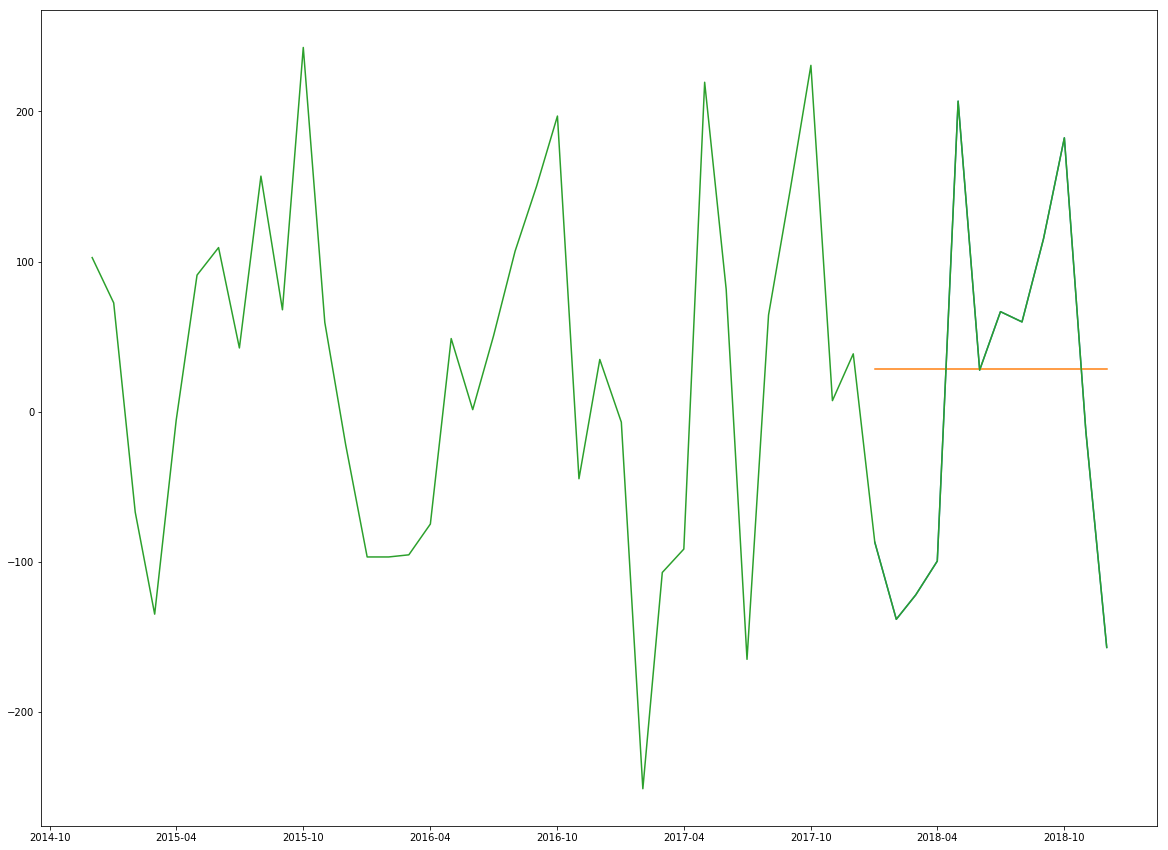

In [30]:
# Compare SES model prediction and observed values
future_forecast1 =pd.DataFrame(predictions2018, index=ts_movingdifftest.index, columns=['Prediction'])
plt.plot(pd.concat([ts_movingdifftest, future_forecast1], axis=1))
plt.plot(ts_movingdifference)

## Decomposition

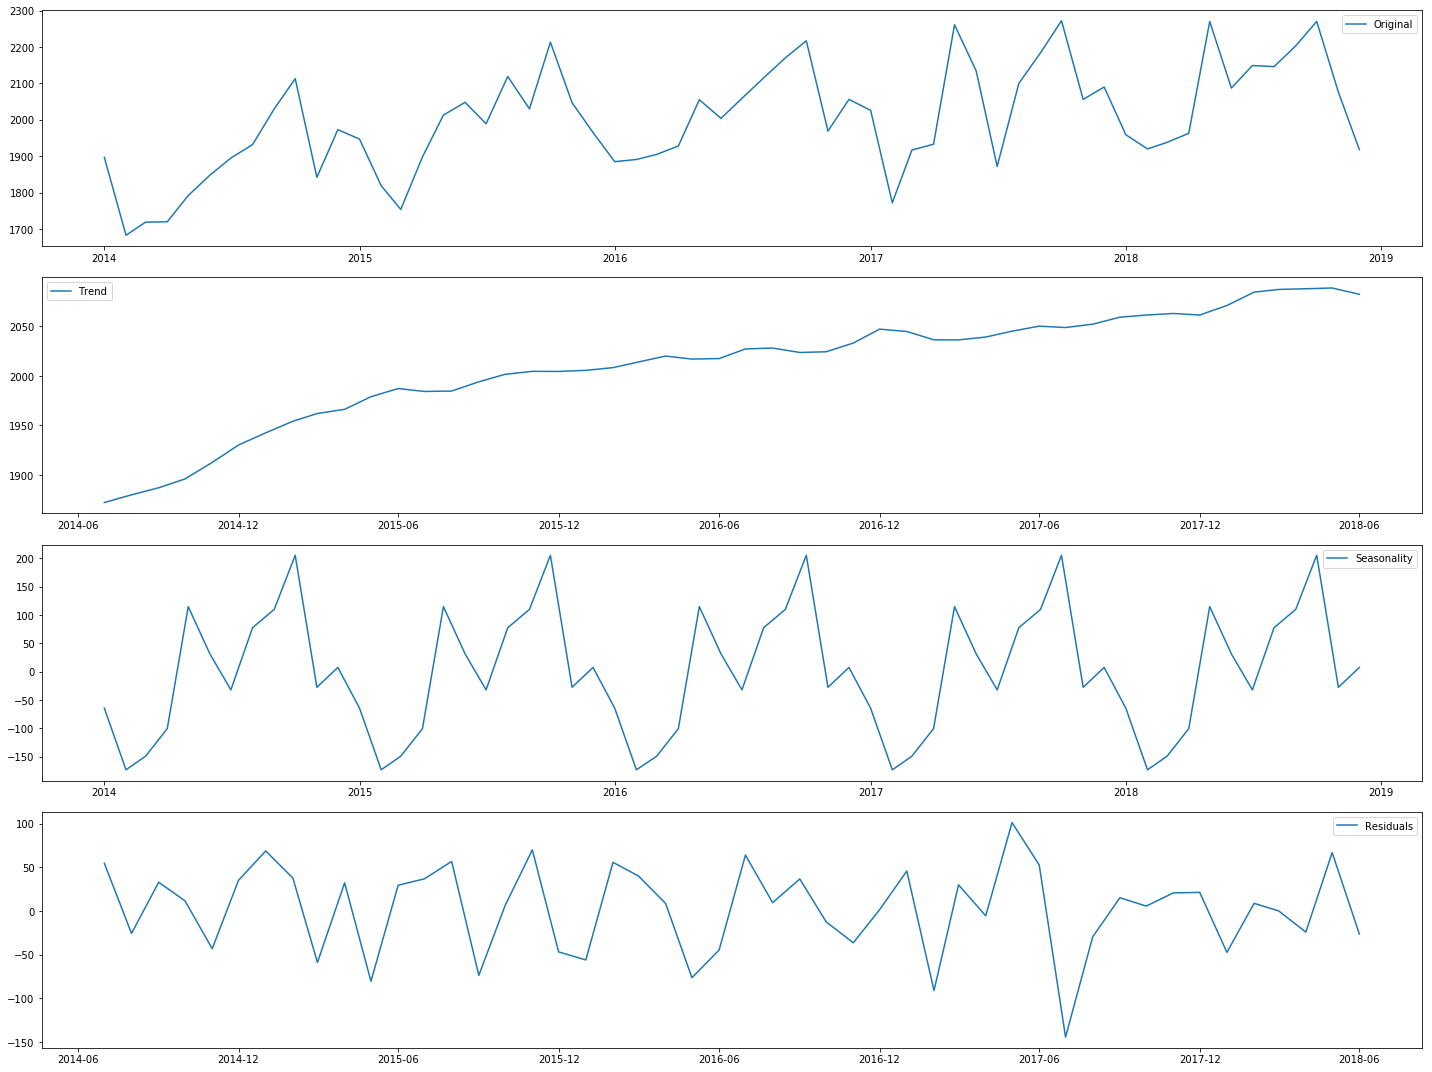

In [31]:
# let's look at the overall trend and possible seasonality of the initial data

from statsmodels.tsa. seasonal import seasonal_decompose
decomposition = seasonal_decompose(accidents_ts3)
trend=decomposition.trend
seasonal = decomposition.seasonal
residual=decomposition.resid

# plot the time series and its decomposition on separate graphs
plt.subplot(411)
plt.plot(accidents_ts3, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


The graphs above demonstrate that in addition to the main trend, there is a pronounced seasonal factor in the number of accidents in Denver. It means that we need to use a model that can account for all these components.


### Auto-Regressive Integrated Moving Averages (ARIMA) Model

In [32]:
import pmdarima as pm

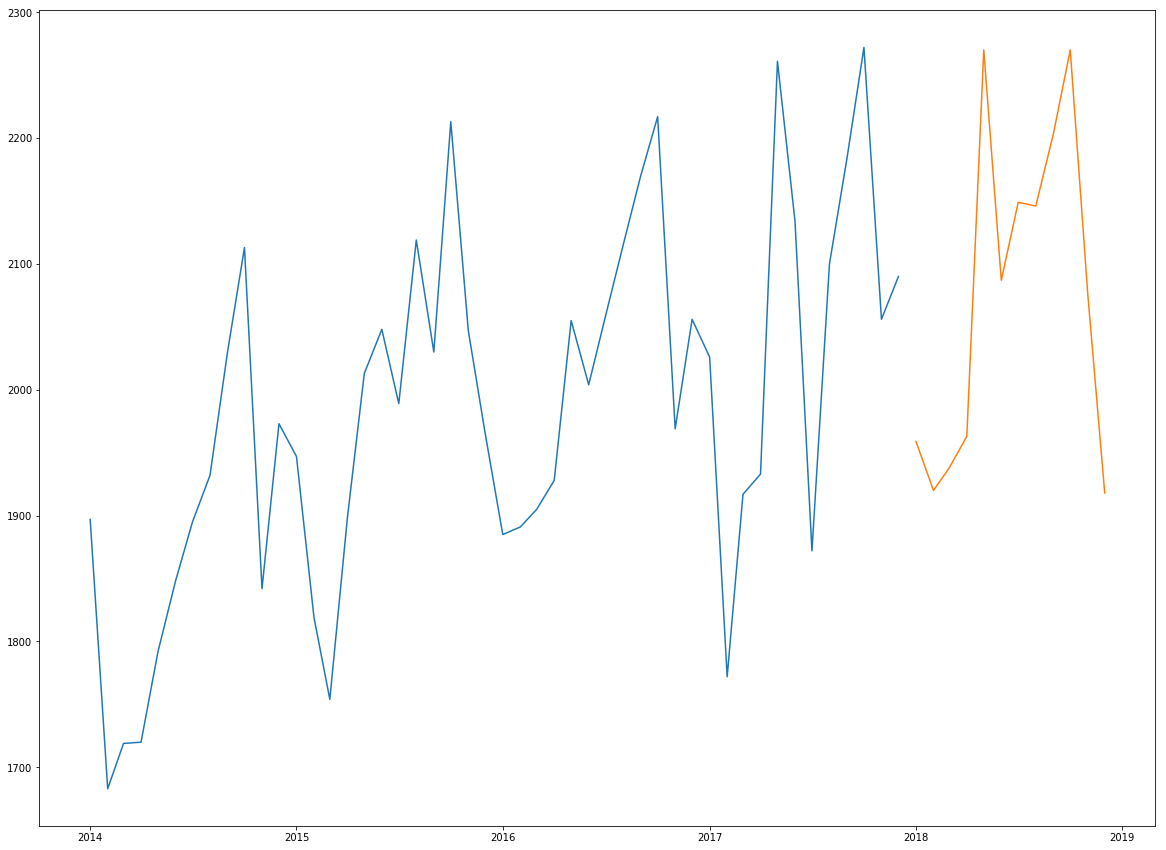

In [33]:
# Use autofit ARIMA model - Auto-Regressive Integrated Moving Averages

# divide the initial unprocessed accidents_ts3 df into training and testing
train= accidents_ts3[:int(0.8*(len(accidents_ts3['NumberOfAccidents'])))] #2014-2017
test = accidents_ts3[int(0.8*(len(accidents_ts3['NumberOfAccidents']))):] #2018

#plot the data
plt.plot(train)
plt.plot(test)

In [34]:
# fit a stepwise auto-ARIMA
stepwise_fit=pm.auto_arima(train, start_p=1, start_q=1,
                             max_p=3, max_q=3, m=12,
                             start_P=0, seasonal=True,
                             d=1, D=1, trace=True,
                             error_action='ignore',  
                             suppress_warnings=True,
                             stepwise=True) 

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=442.988, BIC=446.099, Fit time=0.020 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=433.795, BIC=440.016, Fit time=0.258 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=440.250, BIC=444.916, Fit time=0.126 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 0, 12); AIC=435.756, BIC=443.533, Fit time=0.613 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=436.834, BIC=441.500, Fit time=0.181 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=429.953, BIC=437.730, Fit


The best model fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 1, 0, 12) wihci minimizes both AIC and BIC criteria (AIC=420.876, BIC=430.208)


In [35]:
# model fit results
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   48
Model:             SARIMAX(2, 1, 1)x(1, 1, 0, 12)   Log Likelihood                -204.438
Date:                            Tue, 05 Mar 2019   AIC                            420.876
Time:                                    19:32:15   BIC                            430.208
Sample:                                         0   HQIC                           424.097
                                             - 48                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -6.5117      2.936     -2.218      0.027     -12.267      -0.757
ar.L1         -0.0243      0.290     -0.084      0.933      -0.593       0.545
ar.L2         -0.2649      0.251     -1.054      0.292      -0.757       0.228
ma.L1         -0.9994     48.750     -0.021      0.984     -96.547      94.548
ar.S.L12      -0.4797      0.289     -1.660      0.097      -1.046       0.087
sigma2      5607.6262   2.73e+05      0.021      0.984    -5.3e+05    5.41e+05
===================================================================================
Ljung-Box (Q):                       23.17   Jarque-Bera (JB):                 0.38
Prob(Q):                              0.92   Prob(JB):                         0.83
Heteroskedasticity (H):               1.11   Skew:                            -0.25
Prob(H) (two-sided):                  0.86   Kurtosis:                         3.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [36]:
# Make predictions
predict2018_arima=stepwise_fit.predict(n_periods=12)

In [37]:
# ARIMA predictions for 2018
predict2018_arima

array([1960.10352464, 1818.72504819, 1914.77493059, 1930.48954816,
       2151.96496763, 2056.12178382, 1942.4828652 , 2082.95562539,
       2147.6361642 , 2210.9169516 , 1974.60989857, 2028.98125748])

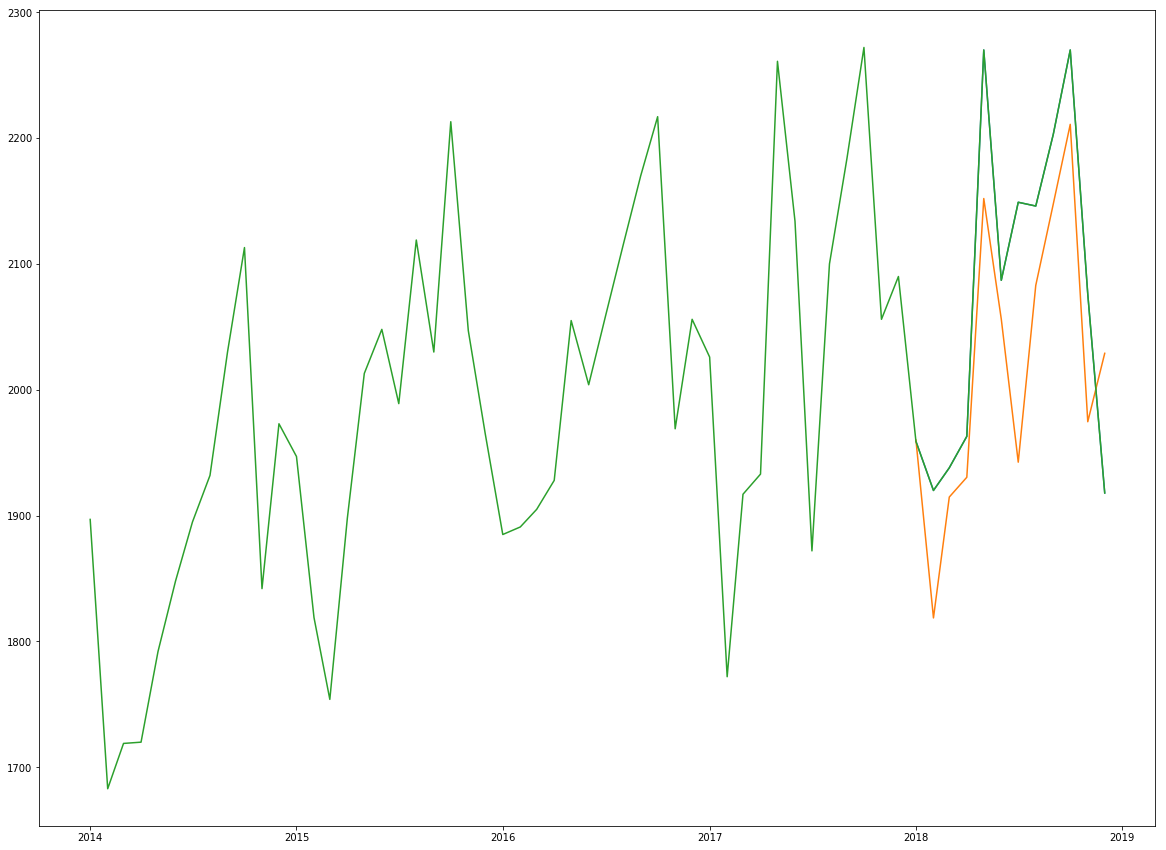

In [38]:
#Compare prediction and observed values
future_forecast =pd.DataFrame(predict2018_arima, index=test.index, columns=['Prediction'])
plt.plot(pd.concat([test, future_forecast], axis=1))
plt.plot(accidents_ts3)

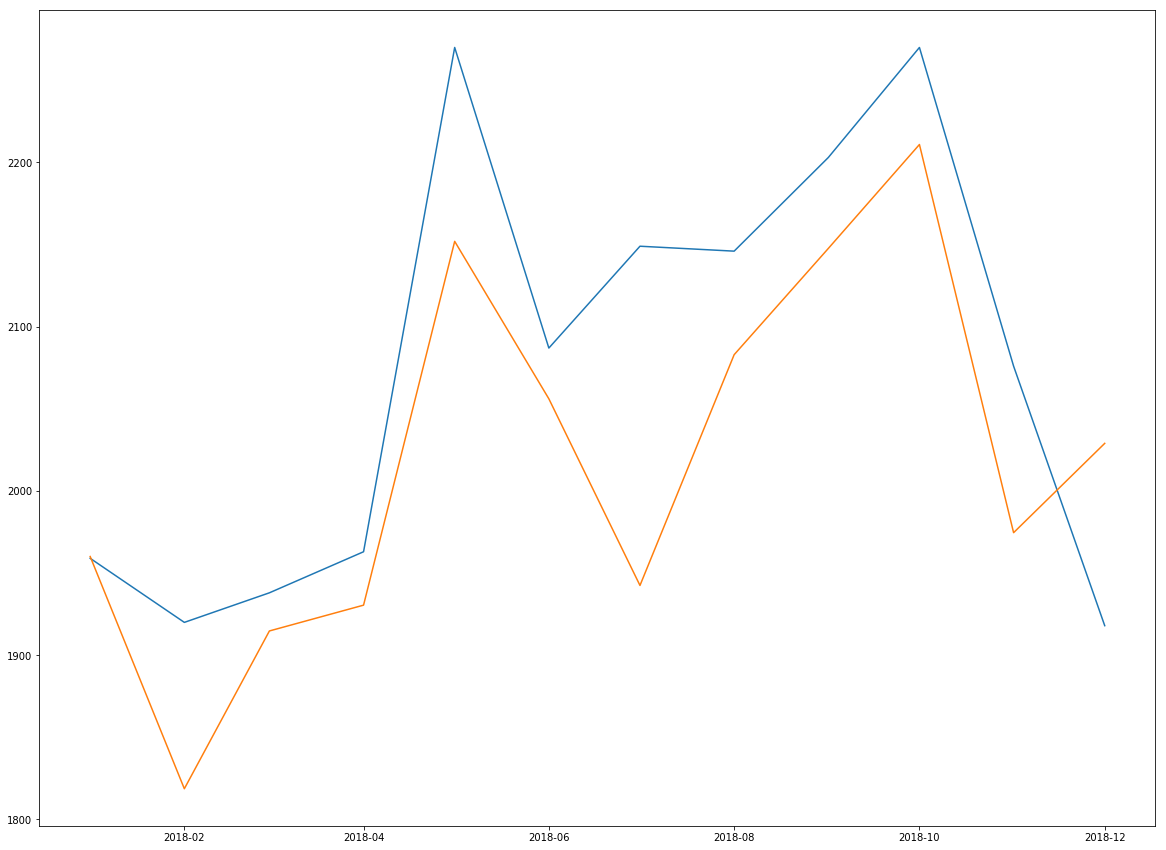

In [39]:
# zoom onto the prediction period - 2018
plt.plot(pd.concat([test, future_forecast], axis=1))

In [42]:
# Evaluate resulats
# Mean squared error
import sklearn.metrics
error2 = sklearn.metrics.mean_squared_error(accidents_ts3['2018']['NumberOfAccidents'], predict2018_arima)
error2

8543.047774965593

In [43]:
print('Mean Squared Errors:')
print ('ARIMA : %f' % error2)
print ('SES : %f' % error1)

Mean Squared Errors:
ARIMA : 8543.047775
SES : 15152.690982


As the output above shows, ARIMA's prediction was much closer to the observed accident numbers for 2018 compared to the SES model (Simple Exponential Smoothing). 

In [44]:
#Explained variance
sklearn.metrics.explained_variance_score(accidents_ts3['2018']['NumberOfAccidents'], predict2018_arima)

0.6740105385713231

In [45]:
# Mean absolute error
sklearn.metrics.mean_absolute_error(accidents_ts3['2018']['NumberOfAccidents'], predict2018_arima)

75.28391656436058

In [46]:
# Mean squared error
sklearn.metrics.mean_squared_error(accidents_ts3['2018']['NumberOfAccidents'], predict2018_arima)

8543.047774965593

In [47]:
# Median absolute error
sklearn.metrics.median_absolute_error(accidents_ts3['2018']['NumberOfAccidents'], predict2018_arima)

61.06371150877408

In [48]:
#R2, coefficient of determination, describes how well future observations are likely to be predicted [-1, 1]
sklearn.metrics.r2_score(accidents_ts3['2018']['NumberOfAccidents'], predict2018_arima) 

0.4783904631292084